In [1]:
#descripcion: este es un clasificador de ropa del repo Fasion Minst con el que utilizare Redes Neuronales para hacer la clasificacion
#Josue David Lopez Florian 17081

In [3]:
#librerias a usar
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

lo primero es obtener y cargar el dataset. Ya que hemos revisado la documentacion, pues tenemos una idea de que nos podemos encontrar dentro de el.

In [4]:
#cargar el data ser
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


en esta siguiente parte veremos el codifo para poder visualizar las imagenes que vienen dentro del dataset. los rangos esta de 0 a 9 en el img_index, pues es la variable para elegir el tipo de ropa a visualizar

Etiqueta de la imagen 3


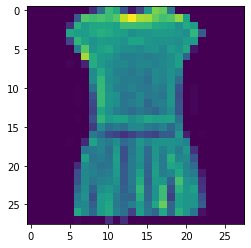

In [5]:
#visualizar el training para las imagenes
img_index = 3
img = train_images[img_index]
print("Etiqueta de la imagen", train_labels[img_index])
plt.imshow(img)

en la siguiente parte veremos la forma y dimensiones de los data set de train y test a usar en este lab

In [6]:
#imprimiendo la forma de las imagenes
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


aqui ocurre la implementacion de nuestro modelo de la red neuronal para llevar a cabo la clasificacion

In [7]:
#creando el modelo de la red neuronal
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
#compilando el modelo
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ahora entrenamos el modelo para poder obtener el mejor acurracy que nos de los mejores indicadores

In [9]:
#aqui se entrena al modelo
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.8837 - accuracy: 0.7019
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6641 - accuracy: 0.7654
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6105 - accuracy: 0.7818
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5527 - accuracy: 0.8046
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5268 - accuracy: 0.8165


In [10]:
#aqui evaluare el modelo
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.8128


[0.56226646900177, 0.8127999901771545]

el modelo puede variar de acurracy, dependiendo los valores, pero obtenemos un confiable 0.8 como minimo de ocurrancy. ESto no da un 80% en que nuestro modelo ha sido bien entrenado con las capas usadas en el y es lo suficientemente confiable.

En esta seccion iniciamos la clasifiacion con el modelo entrenado y cualquier prenda random. Para no hacer tan pesado este procedimiento lo haremos con un mino de 5 a 10 prendas de todo el dataset. aqui se debera volver a correr el programa para obtener resultados distinto enla siguiente seccion de codigo.

In [11]:
#aqui haremos las clasificaciones de la ropa
var2 = random.randint(5, 10)
var1 = random.randint(0, 6000 - var2)
predictions = model.predict(test_images[var1:var1+var2])

#mostrando la clasificacion por etiquetas
print(np.argmax(predictions, axis=1))

#mostrar el valor de la etiqueta actual
print(test_labels[var1:var1+var2])

[4 4 2 0 6 0 8 7 6]
[6 4 2 6 6 3 8 7 6]


podemos ver que los numero encajan con los de arriba la mayor parte. esto nos da a entender que se ha clasificado correctamente los que tienen el mismo numero de prenda correspondiente a su posicion en el array.

En esta seccion podemos visualizar cuales fueron las imagenes clasificadas y ver si encajan con la prediccion hecha por el algoritmo.

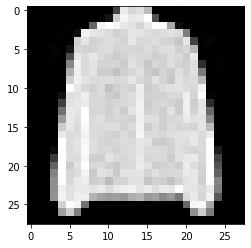

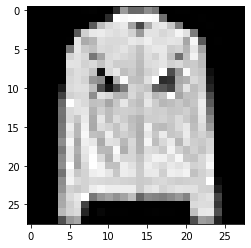

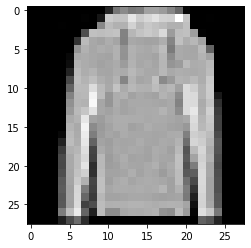

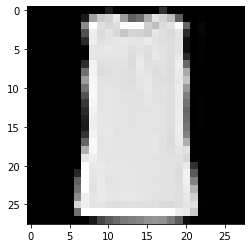

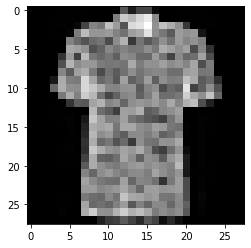

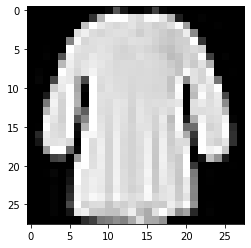

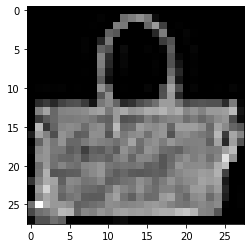

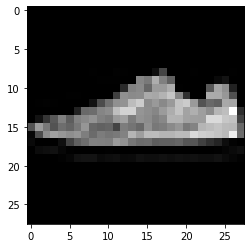

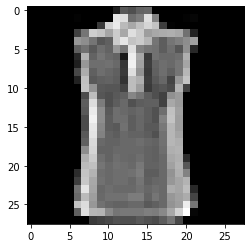

In [12]:
#imprimir hasta un minimo de 5 imagenes
for i in range(var1,var1+var2):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels =first_image.reshape(28,28)
  plt.imshow(test_images[i], cmap = 'gray')
  plt.show()

Con estos resultados podemos dar seguridad de que el modelo funciona muy bien y que solo basta con ver los resultados obtenidos para de acurracy. Ademas que las predicciones encajan con sus respectivas prendas, en la mayoria de casos.

In [18]:
%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
tensorflow       2.2.0
numpy            1.18.4
tensorflow.keras 2.3.0-tf

